<a href="https://colab.research.google.com/github/Renita09/Diabets-Prediction/blob/main/session_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

In [ ]:
dia=pd.read_csv('pima-indians-diabetes.csv')
dia.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
dia.shape

(768, 9)

In [ ]:
dia.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#Datatypes are perfect , But we can change Outcome to boolean datatype which will save space.

dia['Outcome']=dia['Outcome'].astype('bool')

In [ ]:
dia.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
Univariate Analysis
In univariate analysis, each variable is analysed individually and we don’t look at more than one variable at a time. It is the simplest and basic form of analysis.
Univariate Analysis can be done for two kinds of variables- Categorical and Numerical.

Categorical Variables
Various Measures of Frequency can be used to analyse a categorical variable by forming frequency tables which counts how often each category of the variable in question occurs and on the basis of such tables, pie and bar charts can also be created. For example, there is a dataset having a variable Continent having three countries as categories. We can count the number of time each category gets repeated
 
Numerical Variable
Various descriptive statistics such as Measures of Frequency (count), Shape (skewness, Kurtosis), Variability (Minimum value, Maximum value, Range, Quantile, Variance, Standard Deviation), Central Tendency (Mean, Median, Mode) can be used to explore a numerical variable. The various visualisation techniques that can be used are mainly histogram and box plot.

In [ ]:
Data is related to healthcare Industry having 768 observations with 9 variable. Target variable is Outcome. It looks like there is no missing value, and boolean, float , integers are different datatypes available. Well descriptive analysis shows that variable Glucose, BoodPressure,SckinThickness, Insulin and BMI have minimum value 0 which does not make any sense, these values are either missing or outliers, I will be treating them later. I can see in Pregnancies column, minimum is 0 (May be this is sign for no pregnancy) which is considerable, But maximum month of pregnancy is 17 which does not make any sense, I will be dealing later. Variance among different predictor variable is varying at large scale , Scaling data will be helpful for Predective modelling.

In [ ]:
#univariate analysis
##One variable analysed at a time

In [ ]:
#Calculating Central Tendency
# MEAN -  average value of given numeric values
dia.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [ ]:
# Median -  average value of given numeric values
dia.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
#Mode -  most frequently occurring value of given numeric variables
dia.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [ ]:
dia['Pregnancies'].mean()

3.8450520833333335

In [ ]:
dia['Glucose'].median()

117.0

In [ ]:
dia['BMI'].mode()

0    32.0
dtype: float64

In [ ]:
# Dispersion
Dispersion is used to define variation present in given variable. Variation means how values are close or away from the mean value

In [ ]:
#Variance — its gives average deviation from mean value
dia.var()


Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [ ]:
#Standard Deviation — it is square root of variance
dia.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [ ]:
#Range — it gives difference between max and min value
dia.max()-dia.min()

Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness                99.000
Insulin                     846.000
BMI                          67.100
DiabetesPedigreeFunction      2.342
Age                          60.000
Outcome                       1.000
dtype: float64

In [ ]:
dia['BMI'].max()-dia['BMI'].min()

67.1

In [ ]:
dia['BMI'].min()

0.0

In [ ]:
#InterQuartile Range(IQR) — it gives difference between Q3 and Q1, where Q3 is 3rd Quartile value and Q1 is 1st Quartile value.
dia.quantile([.25,.50,.75])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.25,1.0,99.00,62.0,0.0,0.00,27.3,0.24375,24.0,0.0
0.50,3.0,117.00,72.0,23.0,30.50,32.0,0.37250,29.0,0.0
0.75,6.0,140.25,80.0,32.0,127.25,36.6,0.62625,41.0,1.0


In [ ]:
#Skewness
Skewness is used to measure symmetry of data along with the mean value. Symmetry means equal distribution of observation above or below the mean.

##skewness = 0: if data is symmetric along with mean

##skewness = Negative: if data is not symmetric and right side tail is longer than left side tail of density plot.

##skewness = Positive: if data is not symmetric and left side tail is longer than right side tail in density plot.

dia['BMI'].skew()

SyntaxError: invalid syntax (Temp/ipykernel_11240/480457303.py, line 2)

In [ ]:
dia['BMI'].skew()

-0.42898158845356543

In [ ]:
dia.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [ ]:
#Kurtosis is used to defined peakedness ( or flatness) of density plot (normal distribution plot). 

##kurtosis = 0: if peakedness of graph is equal to normal distribution.

##kurtosis = Negative: if peakedness of graph is less than normal distribution(flat plot)

##kurtosis = Positive: if peakedness of graph is more than normal distribution (more peaked plot)

In [ ]:
dia.kurt()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

C:\Users\91638\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

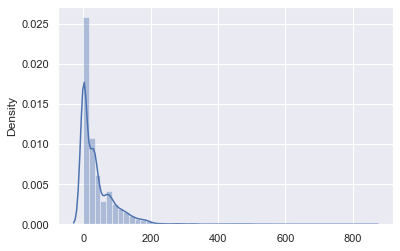

In [ ]:
import seaborn as sns
sns.distplot(dia,hist=True,kde=True)

<AxesSubplot:>

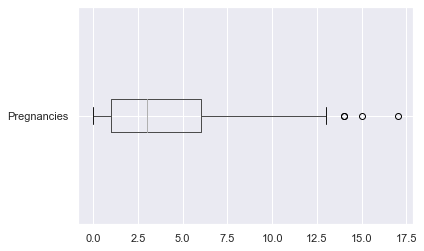

In [ ]:
dia.boxplot(column="Pregnancies",vert=False)

<AxesSubplot:>

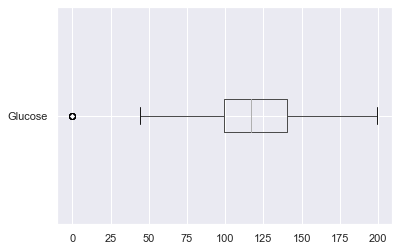

In [ ]:
dia.boxplot(column="Glucose",vert=False)

<AxesSubplot:>

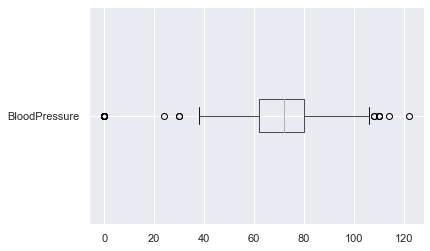

In [ ]:
dia.boxplot(column="BloodPressure",vert=False)

<AxesSubplot:>

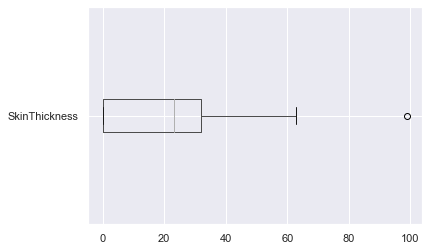

In [ ]:
dia.boxplot(column="SkinThickness",vert=False)

<AxesSubplot:>

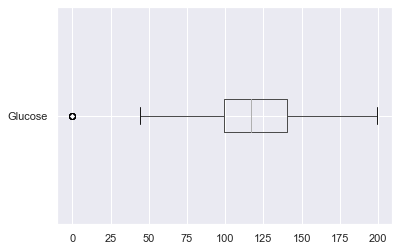

In [ ]:
dia.boxplot(column="Glucose",vert=False)

<AxesSubplot:>

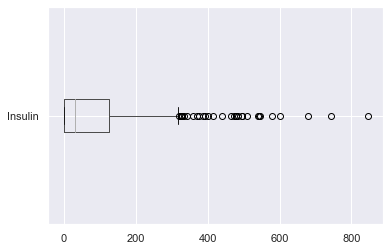

In [ ]:
dia.boxplot(column="Insulin",vert=False)

<AxesSubplot:>

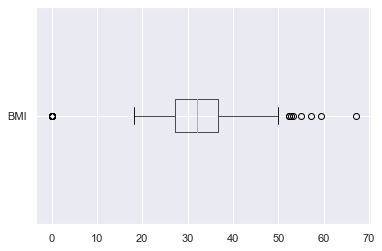

In [ ]:
dia.boxplot(column="BMI",vert=False)